In [51]:
# Imports
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
np.set_printoptions(threshold=np.nan)

In [56]:
# Reading the training data
data_train = pd.read_csv('ex3_train.csv', sep=",", encoding='utf-8', header='infer')
df_train = data_train

y_train = df_train['y']
X_train = df_train.drop(['y'], axis=1) 

X_train_mat = np.matrix(X_train).T
y_train_mat = oneHotEncode(y_train).T

print(X_train_mat.shape)
print(y_train_mat.shape)


(400, 3500)
(10, 3500)


(400, 1500)
(1, 1500)
7    0
Name: y, dtype: int64


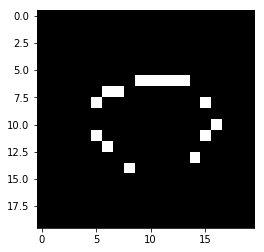

In [64]:
# Reading the test data
data_test = pd.read_csv('ex3_test.csv', sep=",", encoding='utf-8', header='infer')
df_test = data_test

y_test = df_test['y']
X_test = df_test.drop(['y'], axis=1)

X_test_mat = np.matrix(X_test).T
y_test_mat = np.matrix(y_test)

print(X_test_mat.shape)
print(y_test_mat.shape)

#Plot the selected pixel
num = 7
pixels = np.array(X_test[num:num+1], dtype='uint8')
print(y_test[num:num+1])
pixels = pixels.reshape((20, 20))
plt.imshow(pixels, cmap='gray')
plt.show()


# Adding one's column for bias
# X_test.insert(0,-1,1) 



In [81]:
# One hot Encoding the categorical output values to binary by adding 1's for that index and 0's otherwise
def oneHotEncode(y):
    enc = pd.get_dummies(y)
    return np.matrix(enc)


# Applying Sigmoid Activation function to the hidden layer outputs used while forward propagation
# works with scalar, arrays and matrix as well
# Purpose of this method is to do squishing on the linear function
def apply_sigmoid(z):
    return 1/(1+np.exp(-z))

# Applying Sigmoid Activation function to the hidden layer outputs used while backward propagation to get gradients
# works with scalar, arrays and matrix as well
# Purpose of this method is to do undo the squishing on the linear function
def apply_sigmoid_prime(z):
    return np.exp(-z)/ ((1+np.exp(-z))**2)


# Forward propagation to calculate yHat by applying activation function twice
def forward_propagate(X, W1, W2, b1, b2):
    Z1 = np.dot(W1.T, X) + b1
    print('z1 shape---')
    print(Z1.shape)
    A1 = apply_sigmoid(Z1)
    print('a1 shape---')
    print(A1.shape)
    Z2 = np.dot(W2.T, A1) + b2
    yHat = apply_sigmoid(Z2) # Output of the last layer(output layer)
    return yHat

# Backward Propagation function to calculate the gradients
def back_propagate(Z1, X, Y, A1, A2, W2):
    m = Y.shape[1]
    print('m is --')
    print(m)
    dZ2 = A2 - Y;
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis =1, keepdims = True)
    dZ1 = np.dot(W2.T, dZ2) * apply_sigmoid_prime(Z1) # element wise product of same dimension matrices
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis =1, keepdims = True)
    
# Get the loss of for the training example
def get_loss(Y, Yhat):
    loss = -(np.dot(Y, np.log(Yhat)) + np.dot((1-Y), np.log(1 - Yhat)))
    return loss

# Softmax activation function to get the probablity of the classes
def softmax(z):
    softMax = (np.exp(z).T / np.sum(np.exp(z),axis=1)).T
    print('softmax is ')
    print(softMax)
    return softMax

In [71]:
# Defining Hyperparameters
inputLayerSize = X_train_mat.shape[0]
hiddenLayerSize = 25 # As specified in assignment requirements
outputLayerSize = 10
print(inputLayerSize)
print(outputLayerSize)
print(hiddenLayerSize)

400
10
25


In [82]:


# Call Forward propagation to calculate yHat
W1 = 0.01* np.random.randn(inputLayerSize,hiddenLayerSize);
W2 = 0.01* np.random.randn(hiddenLayerSize,outputLayerSize);
b1 = np.zeros((hiddenLayerSize,1));
b2 = np.zeros((outputLayerSize,1));
print('w2 shape')
print(W2.shape)
print(X_train_mat.shape)
print(W1.shape)
y_train_Hat = forward_propagate(X_train_mat, W1, W2, b1, b2)
# print('y is ')
# print(y_train_mat)
# print(y_train_Hat)

w2 shape
(25, 10)
(400, 3500)
(400, 25)
z1 shape---
(25, 3500)
a1 shape---
(25, 3500)
y is 
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
  0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
  1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 

[[ 0.50456536  0.50453338  0.50452084  0.50463082  0.50449163  0.50456167
   0.50444282  0.50448765  0.50459275  0.50456743  0.5044428   0.50443984
   0.50455462  0.50450911  0.5047186   0.50464829  0.50463442  0.50444195
   0.50446278  0.50460396  0.50441742  0.50451368  0.50455856  0.50434744
   0.50443965  0.50466169  0.50455131  0.50450805  0.50437281  0.50458381
   0.50449272  0.50463058  0.50451133  0.50452179  0.50448577  0.50449285
   0.50438643  0.50441979  0.50443796  0.50445607  0.50457217  0.50452428
   0.50453316  0.50434667  0.50453771  0.5046311   0.50451935  0.50455803
   0.50459235  0.50433129  0.50453735  0.50450359  0.50441764  0.5043798
   0.50427652  0.50467239  0.50462646  0.50454975  0.50442905  0.50444278
   0.50458641  0.50467668  0.50448332  0.50454117  0.50447278  0.50463416
   0.50462315  0.50433548  0.50460649  0.50462839  0.50474913  0.50464949
   0.50450593  0.50461493  0.50455727  0.50442901  0.50445806  0.50448253
   0.50454058  0.50442772  0.50437995  